In [1]:
from UTILITY_quickstart import *

# Real beam

In [2]:
PActual = ParticleGroup("./beams/2024-10-14_Impact_TwoBunch/2024-10-14_TwoBunch.h5")

6.780603624403933e-06
True sigma_x, sigma_xp, rho: 0.0008303825434516614, 0.00025661657663092425, 0.9708400631993147
Optimizer parameters: sigma_x = 0.0007504106398372826, sigma_xp = 0.00025626171013239584, rho = 0.9686002140685324


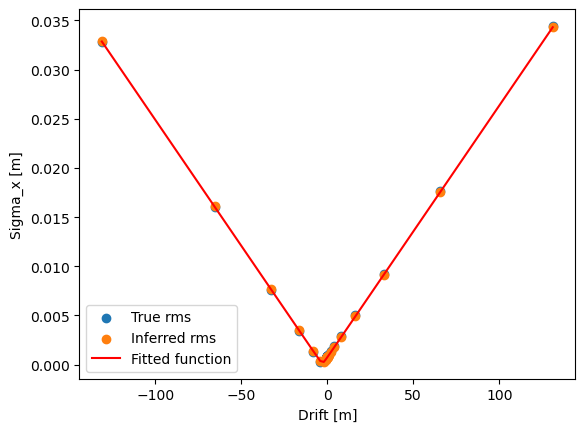

Actual emittance: 	 6.780603624403933e-06
Fit emittance: 		 6.3857405876831995e-06


6.3857405876831995e-06

In [3]:
print(PActual["norm_emit_x"])
smallestIntervalImpliedEmittance(PActual, plane = "x", percentage = 0.90, verbose = True)

In [4]:
PActual.twiss(plane = "x", fraction = 1)["norm_emit_x"]

6.781555890453639e-06

/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/UTILITY_quickstart.py:359: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sigmax**2 + 2 * z * rho * sigmax * sigmaxp + z**2 * sigmaxp**2)


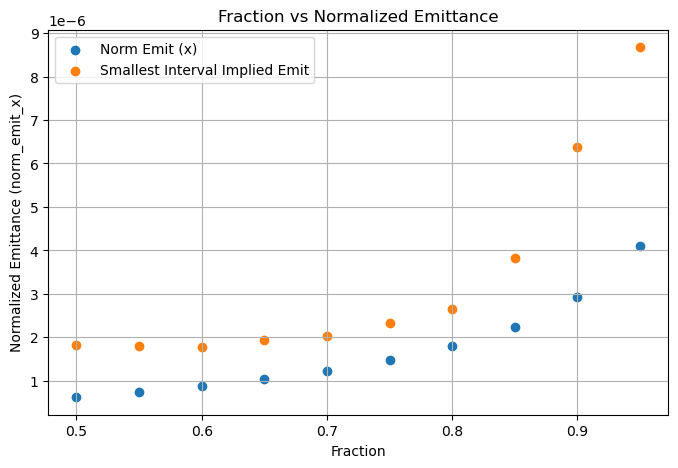

In [5]:
fractions = np.arange(0.5, 1.0, 0.05)
emittances = [PActual.twiss(plane = "x", fraction = f)["norm_emit_x"] for f in fractions]
emittancesSI = [
    smallestIntervalImpliedEmittance(PActual, plane = "x", percentage = f, verbose = False)
    for f in fractions
]


# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(fractions, emittances, label='Norm Emit (x)')
plt.scatter(fractions, emittancesSI, label='Smallest Interval Implied Emit')
plt.xlabel('Fraction')
plt.ylabel('Normalized Emittance (norm_emit_x)')
plt.title('Fraction vs Normalized Emittance')
plt.legend(loc='best')  # Add legend in the best location
plt.grid(True)
plt.show()

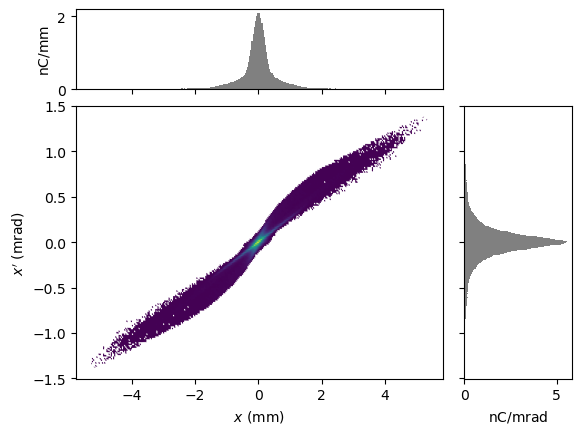

In [6]:
display(plotMod(PActual, 'x', 'xp',  bins=300))
plt.clf()

In [7]:
print(f"""Sigma x: {PActual["sigma_x"]}""")
print(f"""Sigma xp: {PActual["sigma_xp"]}""")
print(f"""Sigma px: {PActual["sigma_px"]}""")

Sigma x: 0.0008303825434516614
Sigma xp: 0.00025661657663092425
Sigma px: 17536.068704624577


# Idealized beam

In [8]:
PIdeal = PActual.copy()

sigmaX = 0.000830
PIdeal.x = np.random.normal(loc=0, scale=sigmaX, size=len(PIdeal.x))

sigmaPX = 17536.0687
PIdeal.px = np.random.normal(loc=0, scale=sigmaPX, size=len(PIdeal.x))

In [9]:
print(f"""Sigma x: {PIdeal["sigma_x"]}""")
print(f"""Sigma xp: {PIdeal["sigma_xp"]}""")
print(f"""Sigma px: {PIdeal["sigma_px"]}""")

print(f"""Analytic emittance: {PIdeal["mean_gamma"] * PIdeal["sigma_x"] * PIdeal["sigma_xp"]}""")

Sigma x: 0.0008301203941032339
Sigma xp: 0.00025744690986374087
Sigma px: 17567.97802125387
Analytic emittance: 2.854402598954751e-05


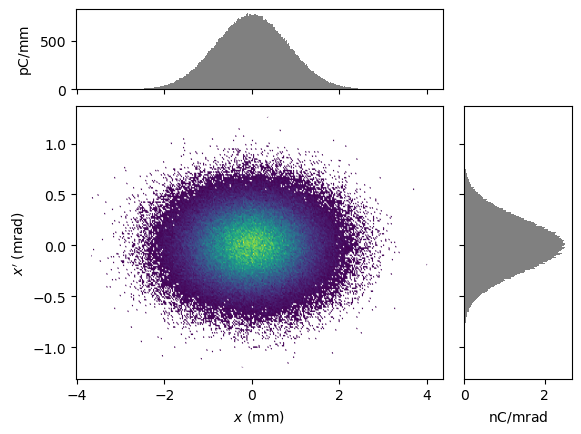

In [10]:
display(plotMod(PIdeal, 'x', 'xp',  bins=300))
plt.clf()

<Figure size 640x480 with 0 Axes>

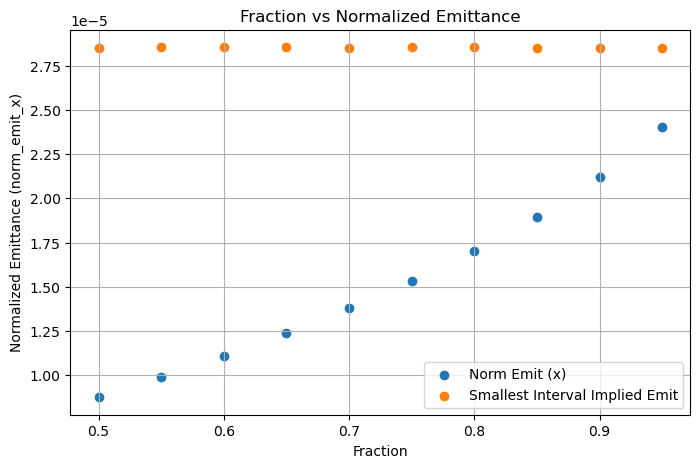

In [11]:
fractions = np.arange(0.5, 1.0, 0.05)
emittances = [PIdeal.twiss(plane = "x", fraction = f)["norm_emit_x"] for f in fractions]
emittancesSI = [
    smallestIntervalImpliedEmittance(PIdeal, plane = "x", percentage = f, verbose = False)
    for f in fractions
]


# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(fractions, emittances, label='Norm Emit (x)')
plt.scatter(fractions, emittancesSI, label='Smallest Interval Implied Emit')
plt.xlabel('Fraction')
plt.ylabel('Normalized Emittance (norm_emit_x)')
plt.title('Fraction vs Normalized Emittance')
plt.legend(loc='best')  # Add legend in the best location
plt.grid(True)
plt.show()

## Idealized beam, non-zero alpha

In [12]:
PIdeal.x = PIdeal.x + PIdeal.xp * 2

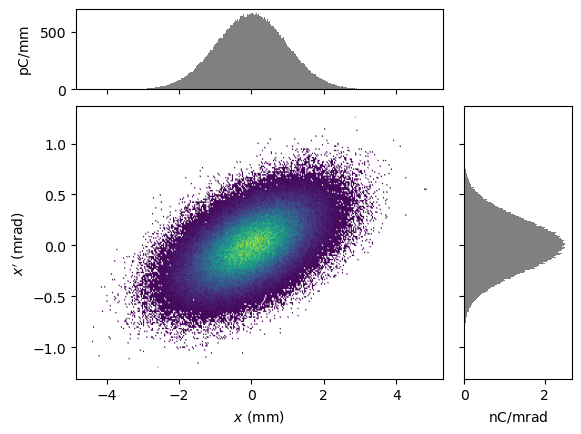

In [13]:
display(plotMod(PIdeal, 'x', 'xp',  bins=300))
plt.clf()

<Figure size 640x480 with 0 Axes>

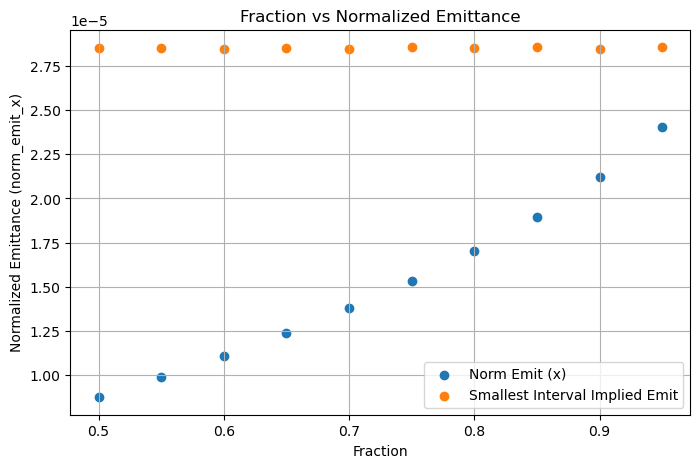

In [14]:
fractions = np.arange(0.5, 1.0, 0.05)
emittances = [PIdeal.twiss(plane = "x", fraction = f)["norm_emit_x"] for f in fractions]
emittancesSI = [
    smallestIntervalImpliedEmittance(PIdeal, plane = "x", percentage = f, verbose = False)
    for f in fractions
]


# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(fractions, emittances, label='Norm Emit (x)')
plt.scatter(fractions, emittancesSI, label='Smallest Interval Implied Emit')
plt.xlabel('Fraction')
plt.ylabel('Normalized Emittance (norm_emit_x)')
plt.title('Fraction vs Normalized Emittance')
plt.legend(loc='best')  # Add legend in the best location
plt.grid(True)
plt.show()

# Summary

For ideal beams, my function returns a ~constant value for the emittance with respect to fraction. This is by design; it is the smallest interval IMPLIED emittance (SIIE).

In contrast, the built in function returns a monotonically increasing emittance with increasing fraction since it's intended to report the emittance of the specified subset. In some contexts this might be useful, but that's not how I personally like to think about beams.

Notably, at least in the tested cases (both real and idealized beams), the SIIE is strictly larger than the OpenPMD emittances. So, if anything, I'm reporting pessimistic numbers compared to what others might be quoting.